In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv

# The bathymetry

Configure the extent 

In [2]:
bathymetry_extent = {
    "xmin" : 90, 
    "xmax" :  325.83,
    "ymin" :  -85,
    "ymax" : 85,
}

In [3]:
nami_extent = {
    "xmin" : 90,
    "xmax" : 325.83,
    "ymin" : -60,
    "ymax" : 70,
}

Bathymetry resolution

In [4]:
ds = 3

Read bathymetry

In [5]:
bathymetry_raw = np.fromfile(f'../data/bathymetry{int(ds)}min',dtype='float64')
bathymetry_shape = np.asarray(bathymetry_raw[:2], dtype=int)    
bathymetry_raw = bathymetry_raw[2:]
bathymetry_raw = bathymetry_raw.reshape(bathymetry_shape)

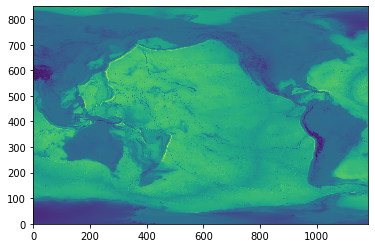

In [6]:
plt.pcolormesh(bathymetry_raw[::4, ::4])

Trim parts of the bathymetry not in the domain of Nami

In [7]:
lat_start_index = int((nami_extent["ymin"] - bathymetry_extent["ymin"])/(ds/60))
lat_end_index = bathymetry_shape[0] - int((bathymetry_extent["ymax"] - nami_extent["ymax"])/(ds/60))
lon_start_index = int((nami_extent["xmin"] - bathymetry_extent["xmin"])/(ds/60))
lon_end_index = bathymetry_shape[1] - int((bathymetry_extent["xmax"] - nami_extent["xmax"])/(ds/60))-1
# print(f"{lat_start_index }=")
# print(f"{lat_end_index = }")
# print(f"{lon_start_index = }")
# print(f"{lon_end_index = }")

In [8]:
bathymetry = bathymetry_raw[lat_start_index:lat_end_index,lon_start_index:lon_end_index]
nlat, nlon = bathymetry.shape
print(f"nlat = {nlat}, nlon = {nlon}")

nlat = 2600, nlon = 4716


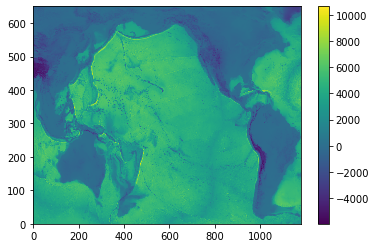

In [9]:
plt.pcolormesh(bathymetry[::4, ::4])
plt.colorbar()

# Read max heights and arrival

In [10]:
def read_large_nami_csv(path):
    reader = csv.reader(open(path))

    for row in reader:
        continue

    return np.array(row, dtype=float)

In [11]:
nami_folder = "../tsunamilab"

In [12]:
hmax_unmasked = read_large_nami_csv(f"{nami_folder}/tlab2D.csv").reshape((nlat,-1))
harr_unmasked = read_large_nami_csv(f"{nami_folder}/tlab2D (1).csv").reshape((nlat,-1))

harr = np.ma.masked_where(bathymetry<500, harr_unmasked)
hmax = np.ma.masked_where(bathymetry<10, hmax_unmasked)

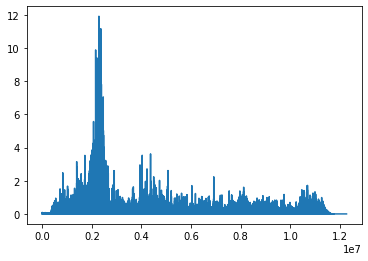

In [13]:
plt.plot(hmax_unmasked.ravel())

In [14]:
np.percentile(hmax_unmasked.ravel(), 90)

0.1504210457205772

In [15]:
x = np.linspace(nami_extent["xmin"], nami_extent["xmax"], nlon)
y = np.linspace(nami_extent["ymin"], nami_extent["ymax"], nlat)
x, y = np.meshgrid(x, y)

Pois locations

In [16]:
[21418,32411,51407,55012]

[21418, 32411, 51407, 55012]

In [17]:
pois={
    21414: [178.219,48.968],
    21419: [155.717,44.435],
    21401: [152.583,42.617],
    21418: [148.645,38.727],
    21413: [152.132,30.533],
    52403: [145.52,4.02],
    52406: [164.977,-5.307],
    55012: [158.453,-15.664],
    51425: [183.68,-9.517],
    51407: [203.455,19.57],
    46404: [231.267,45.853],
    46407: [231.168,42.682],
    46411: [232.933,39.333],
    46412: [239.437,32.492],
    43412: [253.03300000000002,16.045],
    43413: [259.91700000000003,11.012],
    32411: [269.12,4.953],
    32412: [273.626,-17.984],
    32413: [266.483,-7.406],
    32401: [286.579,-20.474],
}
darts_ids = [21413, 32412, 43412, 46404, 46407, 46411, 46412, 51425, 52403]# [21418,32411,51407,55012]
# darts_ids = [21413, 32412, 43412, 46404, 46407, 46411, 46412, 51425, 52403, 21418,32411,51407,55012]

In [18]:
dart_locations = np.array(list(pois.values()))

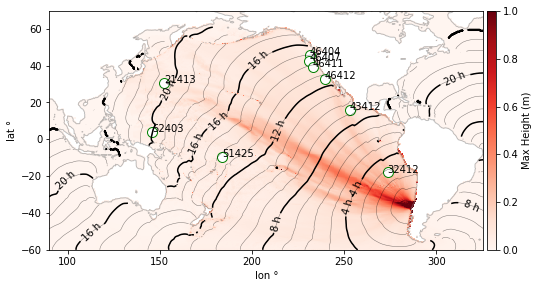

In [19]:
s = 10 #skip size


f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)

p = ax1.pcolormesh(x[::s,::s],y[::s,::s],hmax[::s,::s],vmax=1,vmin=0, cmap=plt.cm.Reds, shading="nearest")
divider = make_axes_locatable(ax1)

for  dart in darts_ids:
    
    [lon, lat] = pois[dart]
    ax1.scatter([lon],[lat],color='white',edgecolor='green',marker='o', s=100)
    ax1.annotate('%s'%dart, [lon+0.1,lat])
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = f.colorbar(p,cax)
cbar.set_label('Max Height (m)')

ax1.contour(x[::s,::s],y[::s,::s], bathymetry[::s,::s], [10], linewidths=1, alpha=0.5, colors='grey')
CS = ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,np.arange(0,24,4),colors='k')
ax1.clabel(CS, inline=1, fontsize=10, fmt='%i h')
ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,
            np.arange(0,24,1),colors='k', linewidths=0.5, alpha=0.5)

ax1.set_aspect(1)
ax1.set_xlabel('lon °')
ax1.set_ylabel('lat °')
f.savefig('energy2010.png',dpi=300,bbox_inches='tight')

In [20]:
x.min(),x.max()

(90.0, 325.83)

# Time series

Read Nami time series

In [21]:
nami = pd.read_json(f"{nami_folder}/pois")

Check that the pixels make sense

In [22]:
nami

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[-90.88, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[1251, 2052]","[1242, 1810]","[1764, 2179]","[1173, 1974]","[1314, 2088]","[3930, 790]","[-3616, 1299]","[3671, 840]","[3528, 1051]","[3260, 1520]","[3397, 1420]","[2824, 2116]","[2822, 2053]","[2858, 1986]","[2988, 1849]","[2268, 1591]","[1873, 1009]","[1110, 1280]","[1499, 1093]","[1369, 886]"
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
time,"[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989..."
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


(152.583, 152.55), (42.617, 42.599999999999994)
(152.132, 152.1), (30.533, 30.5)
(178.219, 178.2), (48.968, 48.95)
(148.645, 148.65), (38.727, 38.7)
(155.717, 155.7), (44.435, 44.400000000000006)
(286.579, 286.5), (-20.474, -20.5)
(-90.88, -90.80000000000001), (4.953, 4.950000000000003)
(273.626, 273.55), (-17.984, -18.0)
(266.483, 266.4), (-7.406, -7.450000000000003)
(253.03300000000002, 253.0), (16.045, 16.0)
(259.91700000000003, 259.85), (11.012, 11.0)
(231.267, 231.2), (45.853, 45.8)
(231.168, 231.1), (42.682, 42.650000000000006)
(232.933, 232.9), (39.333, 39.3)
(239.437, 239.4), (32.492, 32.45)
(203.455, 203.4), (19.57, 19.549999999999997)
(183.68, 183.65), (-9.517, -9.549999999999997)
(145.52, 145.5), (4.02, 4.0)
(164.977, 164.95), (-5.307, -5.350000000000001)
(158.453, 158.45), (-15.664, -15.700000000000003)


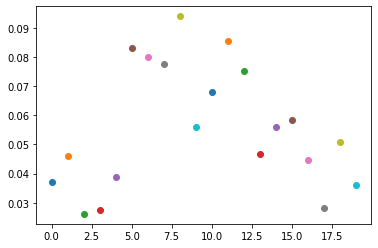

In [23]:
for i, buoy in enumerate(nami.keys()):
    buoy_lon, buoy_lat = nami[buoy]["location"]
    buoy_lon_pixel, buoy_lat_pixel = nami[buoy]["pixel"]
    lon_pixel = buoy_lon_pixel * ds/60 + nami_extent["xmin"]
    lat_pixel = buoy_lat_pixel * ds/60 + nami_extent["ymin"]  
    p0 = np.array([buoy_lon, buoy_lat])
    p1 = np.array([lon_pixel, lat_pixel])
    distance = np.linalg.norm(p0-p1, 2)
    plt.scatter([i], [distance])
    print(f"{buoy_lon, lon_pixel}, {buoy_lat, lat_pixel}")



Read Easywave time series

In [24]:
ewave = pd.read_csv('../easyWave/eWave.poi.ssh', delim_whitespace=True)

Read DART buoys time series

In [25]:
darts = {}
for dart in darts_ids:
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [26]:
starts = {
    21413: 1200,
    32412: 150,
    43412: 550,
    46404: 900,
    46407: 850,
    46411:800,
    46412: 750,
    51425: 800,
    52403: 1250
}

In [27]:
group1 = [32412, 43412, 46412]
group2 = [46411, 46407, 46404]
group3 = [51425, 52403, 21413]
orderedBuoys = [32412, 46411, 51425, 43412, 46407, 52403, 46412, 46404, 21413]
orderedBuoys = [32412, 43412, 46412, 46411, 46407, 51425, 46404, 52403, 21413 ]

In [28]:
yranges = {
    46411: [-0.05, 0.1],
    46404: [-0.1,0.1]
}

GeoClaw timeseries

In [29]:
from clawpack.pyclaw.gauges import GaugeSolution
geoclaw = {
    gauge_id : GaugeSolution(gauge_id=gauge_id, path='../geoclaw/_output')
    for gauge_id in orderedBuoys
    
}

Main figure for the paper

In [30]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6}

matplotlib.rc('font', **font)

2021-05-07 16:06:49,319 WARNING CLAW: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


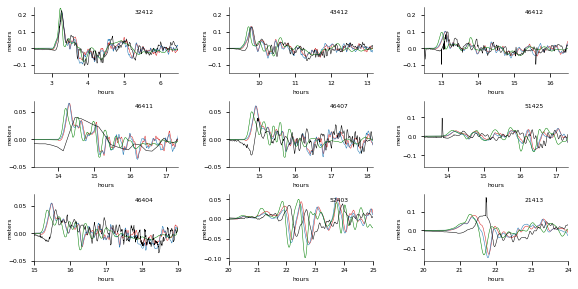

In [31]:
f = plt.figure(figsize=(12 / 1.5, 6 / 1.5))
for i, dart_number in enumerate(orderedBuoys):
    ax = f.add_subplot(3, 3, i + 1)

    ax.plot(
        ewave["Minute"] / 60.0,
        ewave[str(dart_number)],
        label="easywave",
        color="#d62728",
        linewidth=0.5,
    )
    ax.plot(
        np.array(nami[dart_number].time) / 60 / 60,
        nami[dart_number].surface,
        label="nami",
        linewidth=0.5,
    )
    ax.plot(
        geoclaw[dart_number].t / 60 / 60,
        geoclaw[dart_number].q[3, :],
        color="g",
        linewidth=0.5,
        label="geoclaw",
    )    
    ax.plot(
        darts[dart_number][:, 0] * 24,
        darts[dart_number][:, 1],
        label="dart buoy",
        color="k",
        linewidth=0.5,
    )


    xmin = min(starts[dart_number] / 60, 20)
    xmax = min(starts[dart_number] / 60 + 4, 25)
    ax.set_xlim(xmin, xmax)
    ax.annotate("%s" % dart_number, [0.7, 0.9], xycoords="axes fraction")
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_linewidth(0.5)

    ax.spines["bottom"].set_linewidth(0.5)
    xticks = np.arange(np.ceil(xmin), np.ceil(xmax + 0.5), 1, dtype=int)
    ax.set_xticks(xticks)
    if dart_number in group1:
        ax.set_ylim(-0.15, 0.25)
        ax.set_yticks(np.arange(-0.1, 0.2, 0.1))
    elif dart_number in group2:
        ax.set_ylim(-0.05, 0.07)
        ax.set_yticks(np.arange(-0.05, 0.051, 0.05))

    ax.set_xlabel("hours")
    ax.set_ylabel("meters")


f.tight_layout()
f.subplots_adjust(wspace=0.35)
f.savefig("timeseries2010.png", dpi=300, bbox_inches="tight")

* Easywave y nami son iguales entre sí
* Todos llegan antes que las mediciones
* Geoclaw llega siempre antes que los demás

Fact: Ya hay evidencia de que a medida que se propaga se desfasa por efectos de incompresibilidad y elasticidad del fondo


¿Crece la distancia cuando nos alejamos del origen del terrmoto?

# Peak arrival comparison

In [32]:
edited_starts = {
    21413: 21,
    32412: 2.5,
    43412: 9.166666666666666,
    46404: 15.0,
    46407: 14.166666666666666,
    46411: 13.333333333333334,
    46412: 12.5,
    51425: 14,
    52403: 20.833333333333332,
}
ends = {
    32412: 4,
    43412: 11,
    46404: 16,
    46407: 15.5,
    46411: 15.11,
    46412: 13.5,
    51425: 14.6,
    21413: 22,
    52403: 22.3,
}

In [33]:
def get_max_and_max_loc(t, y, time_to_hours_factor, start=0, end=4):
    t = np.array(t) * time_to_hours_factor
    y = np.array(y)
    is_in_interval = (t > start) * (t < end)
    y_filtered = y[is_in_interval]
    t_filtered = t[is_in_interval]

    if len(t_filtered) == 0:
        return t[-1], y[-1]
    return t_filtered[np.argmax(y_filtered)], np.max(y_filtered)


# def get_max_and_max_loc(t, y, time_to_hours_factor, start=0, end=4):
#     t = np.array(t) * time_to_hours_factor
#     y = np.array(y)
#     is_in_interval = (t > start) * (t < end)
#     y_filtered = y[is_in_interval]
#     t_filtered = t[is_in_interval]

#     index = np.where(y_filtered>0.01)[0][0]
#     return t_filtered[index], y_filtered[index]



In [34]:
poisid = [buoy for buoy in orderedBuoys]
peaks = {
    "nami": {
        dart_number: get_max_and_max_loc(
            nami[dart_number].time,
            nami[dart_number].surface,
            time_to_hours_factor=1 / 60 / 60,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
    "easywave": {
        dart_number: get_max_and_max_loc(
            ewave["Minute"], ewave[str(dart_number)], time_to_hours_factor=1 / 60,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
    "geoclaw": {
        dart_number: get_max_and_max_loc(
            geoclaw[dart_number].t, geoclaw[dart_number].q[3, :], time_to_hours_factor=1 / 60 / 60,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
    "measurements": {
        dart_number: get_max_and_max_loc(
            darts[dart_number][:, 0], darts[dart_number][:, 1], time_to_hours_factor=24,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
}

In [35]:
times = {
    model: np.array([
        peaks[model][dart_number][0]
        for dart_number in poisid
    ])
    for model in peaks 
}

differences = {
    model: np.array([
        peaks[model][dart_number][0] - peaks["measurements"][dart_number][0]
        for dart_number in poisid
    ])
    for model in peaks if model != "measurements"
}

In [36]:
from pprint import pprint
pprint(times)

{'easywave': array([ 3.275     ,  9.79166667, 13.10833333, 14.31666667, 14.925     ,
       14.20833333, 15.49166667, 21.925     , 21.40833333]),
 'geoclaw': array([ 3.23881667,  9.71668056, 13.00233333, 14.21243611, 14.80375556,
       14.13306389, 15.36884444, 21.86608611, 21.28947222]),
 'measurements': array([ 3.26701574,  9.81415985, 13.14925558, 14.47643162, 14.9847118 ,
       14.42843526, 15.59864008, 22.11120383, 21.73180785]),
 'nami': array([ 3.27434467,  9.77980025, 13.10145732, 14.30873936, 14.91727477,
       14.20840444, 15.48910228, 21.9089061 , 21.3346314 ])}


In [37]:
order_by_earliest_index = np.argsort(times["measurements"])

In [38]:
poisid

[32412, 43412, 46412, 46411, 46407, 51425, 46404, 52403, 21413]

In [39]:
buoys_sorted_by_earliest = [poisid[index] for index in order_by_earliest_index]

Increase font size to improve readability on screens

(array([0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]),
 <a list of 9 Text major ticklabel objects>)

2021-05-07 16:06:51,319 WARNING CLAW: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
2021-05-07 16:06:51,351 WARNING CLAW: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


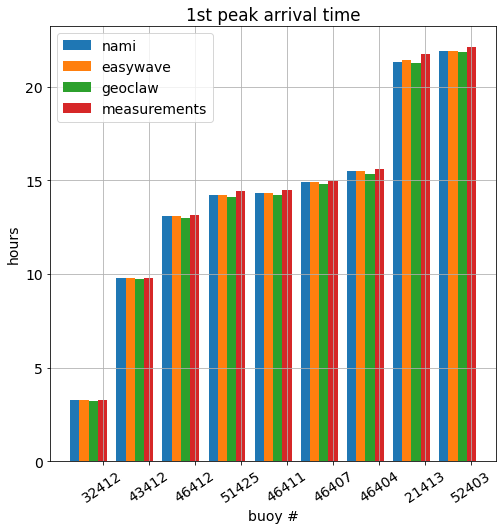

In [40]:
font = {'size'   : 14}
matplotlib.rc('font', **font)

plt.figure(figsize=(8,8))
for i, model in enumerate(times):
    plt.bar(
        np.arange(len(poisid)) + 0.2 * i,
        times[model][order_by_earliest_index],
        width=0.2,
        label=model,
        tick_label=buoys_sorted_by_earliest
    )

plt.xlabel("buoy #")
plt.ylabel("hours")
plt.title("1st peak arrival time")
plt.legend()
plt.grid(which="both")
plt.xticks(rotation=34)

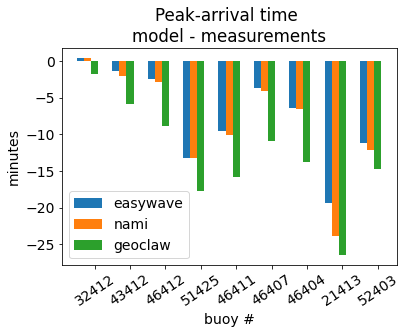

In [41]:
for i, model in enumerate(["easywave", "nami", "geoclaw"]):
    plt.bar(
        np.arange(len(poisid)) + 0.2 * i, 
        differences[model][order_by_earliest_index]*60,
        width=0.2,
        label=model,
        tick_label=buoys_sorted_by_earliest,
    )

plt.ylabel("minutes")
plt.xlabel("buoy #")
plt.title("Peak-arrival time \nmodel - measurements")
plt.xticks(rotation=34)
plt.legend()

Inspect the peaks location on the time series

In [42]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [43]:
colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    "k"
]

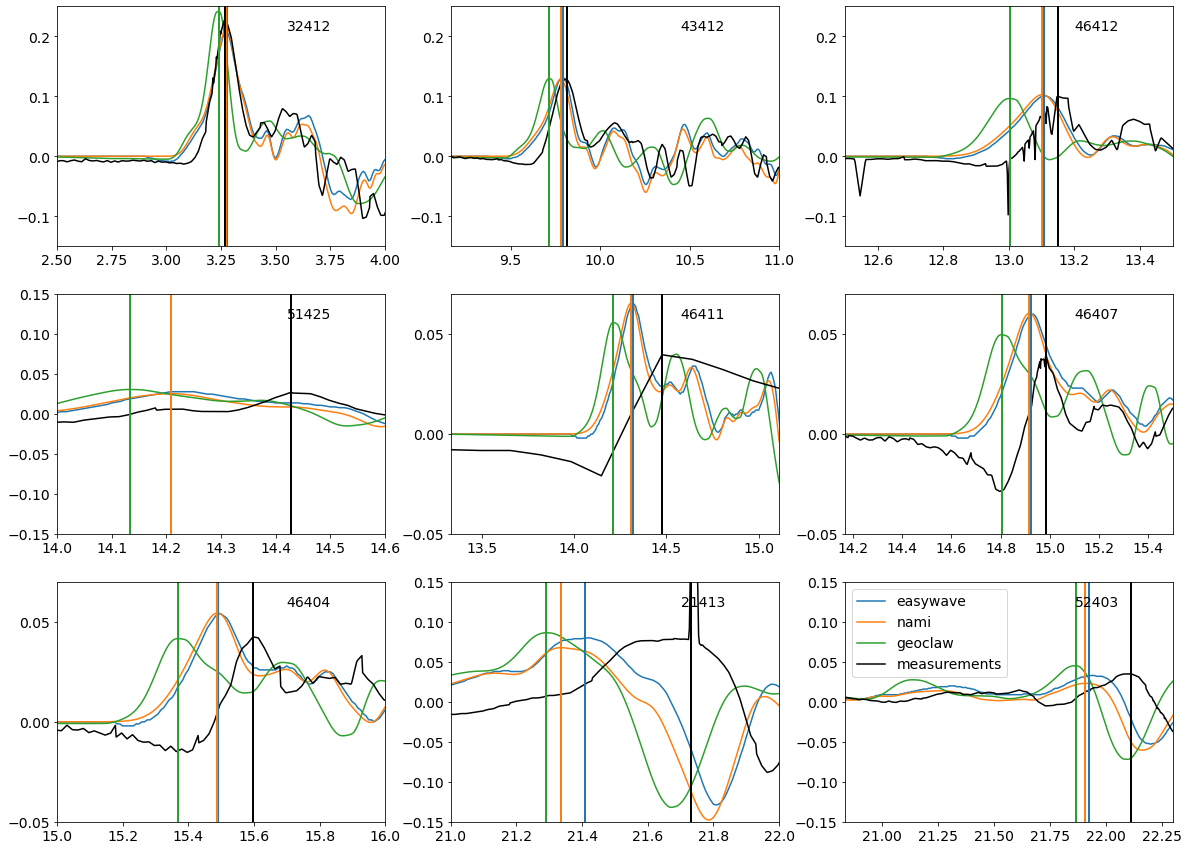

In [44]:
f = plt.figure(figsize=(20, 15))
for i, dart_number in enumerate(np.array(poisid)[order_by_earliest_index]):
    ax = f.add_subplot(3, 3, i + 1)

    ax.plot(
        ewave["Minute"] / 60.0,
        ewave[str(dart_number)],
        label="easywave",
        color=colors[0],
        linewidth=1.5,
    )
    ax.plot(
        np.array(nami[dart_number].time) / 60 / 60,
        nami[dart_number].surface,
        label="nami",
        color=colors[1],
        linewidth=1.5,
    )
    ax.plot(
        geoclaw[dart_number].t / 60 / 60,
        geoclaw[dart_number].q[3, :],
        linewidth=1.5,
        color=colors[2],
        label="geoclaw",
    )
    ax.plot(
        darts[dart_number][:, 0] * 24,
        darts[dart_number][:, 1],
        label="measurements",
        color=colors[3],
        linewidth=1.5,
    )

    ax.set_xlim(edited_starts[dart_number], ends[dart_number])
    for nmodel, model in enumerate([
        "easywave", 
        "nami",
        "geoclaw", 
        "measurements"
    ]):
        if model in []:
            continue
        ax.plot(
            [times[model][order_by_earliest_index[i]], times[model][order_by_earliest_index[i]]],
            [-1, 1],
            color=colors[nmodel],
            linewidth=2,
        )

    if dart_number in group1:
        ax.set_ylim(-0.15, 0.25)
        ax.set_yticks(np.arange(-0.1, 0.2, 0.1))
    elif dart_number in group2:
        ax.set_ylim(-0.05, 0.07)
        ax.set_yticks(np.arange(-0.05, 0.051, 0.05))
    else:
        ax.set_ylim(-0.15, 0.15)
    #         ax.set_yticks(np.arange(-0.05, 0.051, 0.05))
    ax.annotate("%s" % dart_number, [0.7, 0.9], xycoords="axes fraction")

plt.legend()

# Relation between bathymetry and phase err

Also plot it to compare arrival times against the bathymetry

In [45]:
from clawpack.visclaw import colormaps, geoplot

Text(0, 0.5, 'lat °')

2021-05-07 16:06:54,261 WARNING CLAW: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


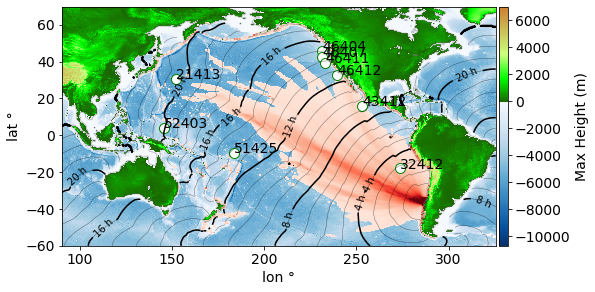

In [46]:
topography = - bathymetry
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')

cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                     data_limits=[topography.min(), topography.max()],
                                     data_break=0)
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)

p = ax1.pcolormesh(x[::s,::s],y[::s,::s],topography[::s,::s],cmap=cmap, norm=norm, shading="nearest")

p2 = ax1.pcolormesh(x[::s,::s],y[::s,::s],np.ma.masked_where(hmax[::s,::s]<=0.1, hmax[::s,::s]),vmax=1,vmin=0, cmap=plt.cm.Reds, shading="nearest")



divider = make_axes_locatable(ax1)

for  dart in darts_ids:
    [lon, lat] = pois[dart]
    ax1.scatter([lon],[lat],color='white',edgecolor='green',marker='o', s=100)
    ax1.annotate('%s'%dart, [lon+0.1,lat])
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = f.colorbar(p,cax)
cbar.set_label('Max Height (m)')

ax1.contour(x[::s,::s],y[::s,::s], bathymetry[::s,::s], [10], linewidths=1, alpha=0.5, colors='grey')
CS = ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,np.arange(0,24,4),colors='k')
ax1.clabel(CS, inline=1, fontsize=10, fmt='%i h')
ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,
            np.arange(0,24,1),colors='k', linewidths=0.5, alpha=0.5)

ax1.set_aspect(1)
ax1.set_xlabel('lon °')
ax1.set_ylabel('lat °')

Ubicaciones y batimetría de cada punto

In [47]:
dart = 21414
buoys_to_compare_bathymetry = [poisid[index] for index in order_by_earliest_index]
bathymetry_to_compare = []
for dart in buoys_to_compare_bathymetry:
    x_index = int((pois[dart][0]-x.min())/(ds/60)+0.5)
    y_index = int((pois[dart][1]-y.min())/(ds/60)+0.5)
    poi_bathymetry = bathymetry[y_index, x_index]
    bathymetry_to_compare.append(poi_bathymetry)
    print(dart,poi_bathymetry)

32412 4394.0
43412 3641.0
46412 3798.0
51425 4771.0
46411 4331.0
46407 3347.0
46404 2769.0
21413 5865.0
52403 4482.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

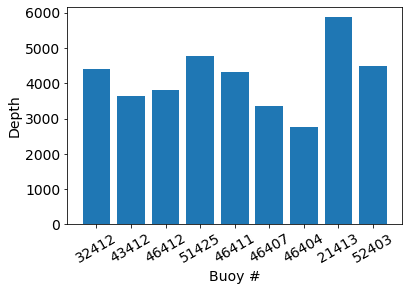

In [48]:
plt.bar(
    np.arange(len(buoys_to_compare_bathymetry)),
    bathymetry_to_compare,
#     width=0.2,
#     label=model,
    tick_label=buoys_to_compare_bathymetry,
)
plt.xlabel("Buoy #")
plt.ylabel("Depth")
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

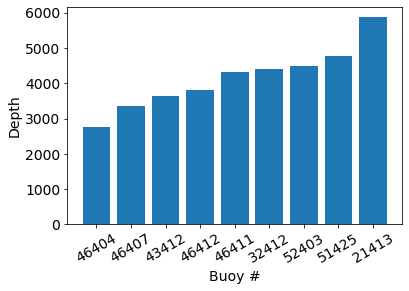

In [49]:
increasing_bathymetry = np.sort(bathymetry_to_compare)
increasing_bathymetry_order = np.argsort(bathymetry_to_compare)
plt.bar(np.arange(len(buoys_to_compare_bathymetry)), increasing_bathymetry, tick_label=[buoys_to_compare_bathymetry[i] for i in increasing_bathymetry_order])
plt.xlabel("Buoy #")
plt.ylabel("Depth")
plt.xticks(rotation=30)

2021-05-07 16:06:55,199 WARNING CLAW: No handles with labels found to put in legend.


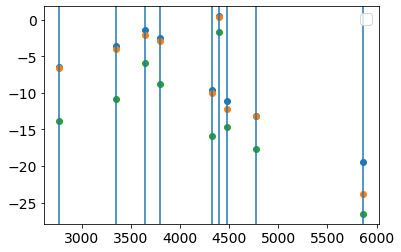

In [50]:
for i, model in enumerate(["easywave", "nami", "geoclaw"]):
    plt.plot(bathymetry_to_compare, differences[model][order_by_earliest_index]*60, "o")
plt.legend()
for b in bathymetry_to_compare:
    plt.axvline(x=b)